In [1]:
%load_ext autoreload
%autoreload 2


from cornea.models.segmentation import segment, clean_segment_mask
from cornea.models.interface import (
    get_interface_line,
    polyfit,
    interpolate,
    extract_interface_line,
    clean_interface_line,
)
import matplotlib.pyplot as plt
import numpy as np
import cv2

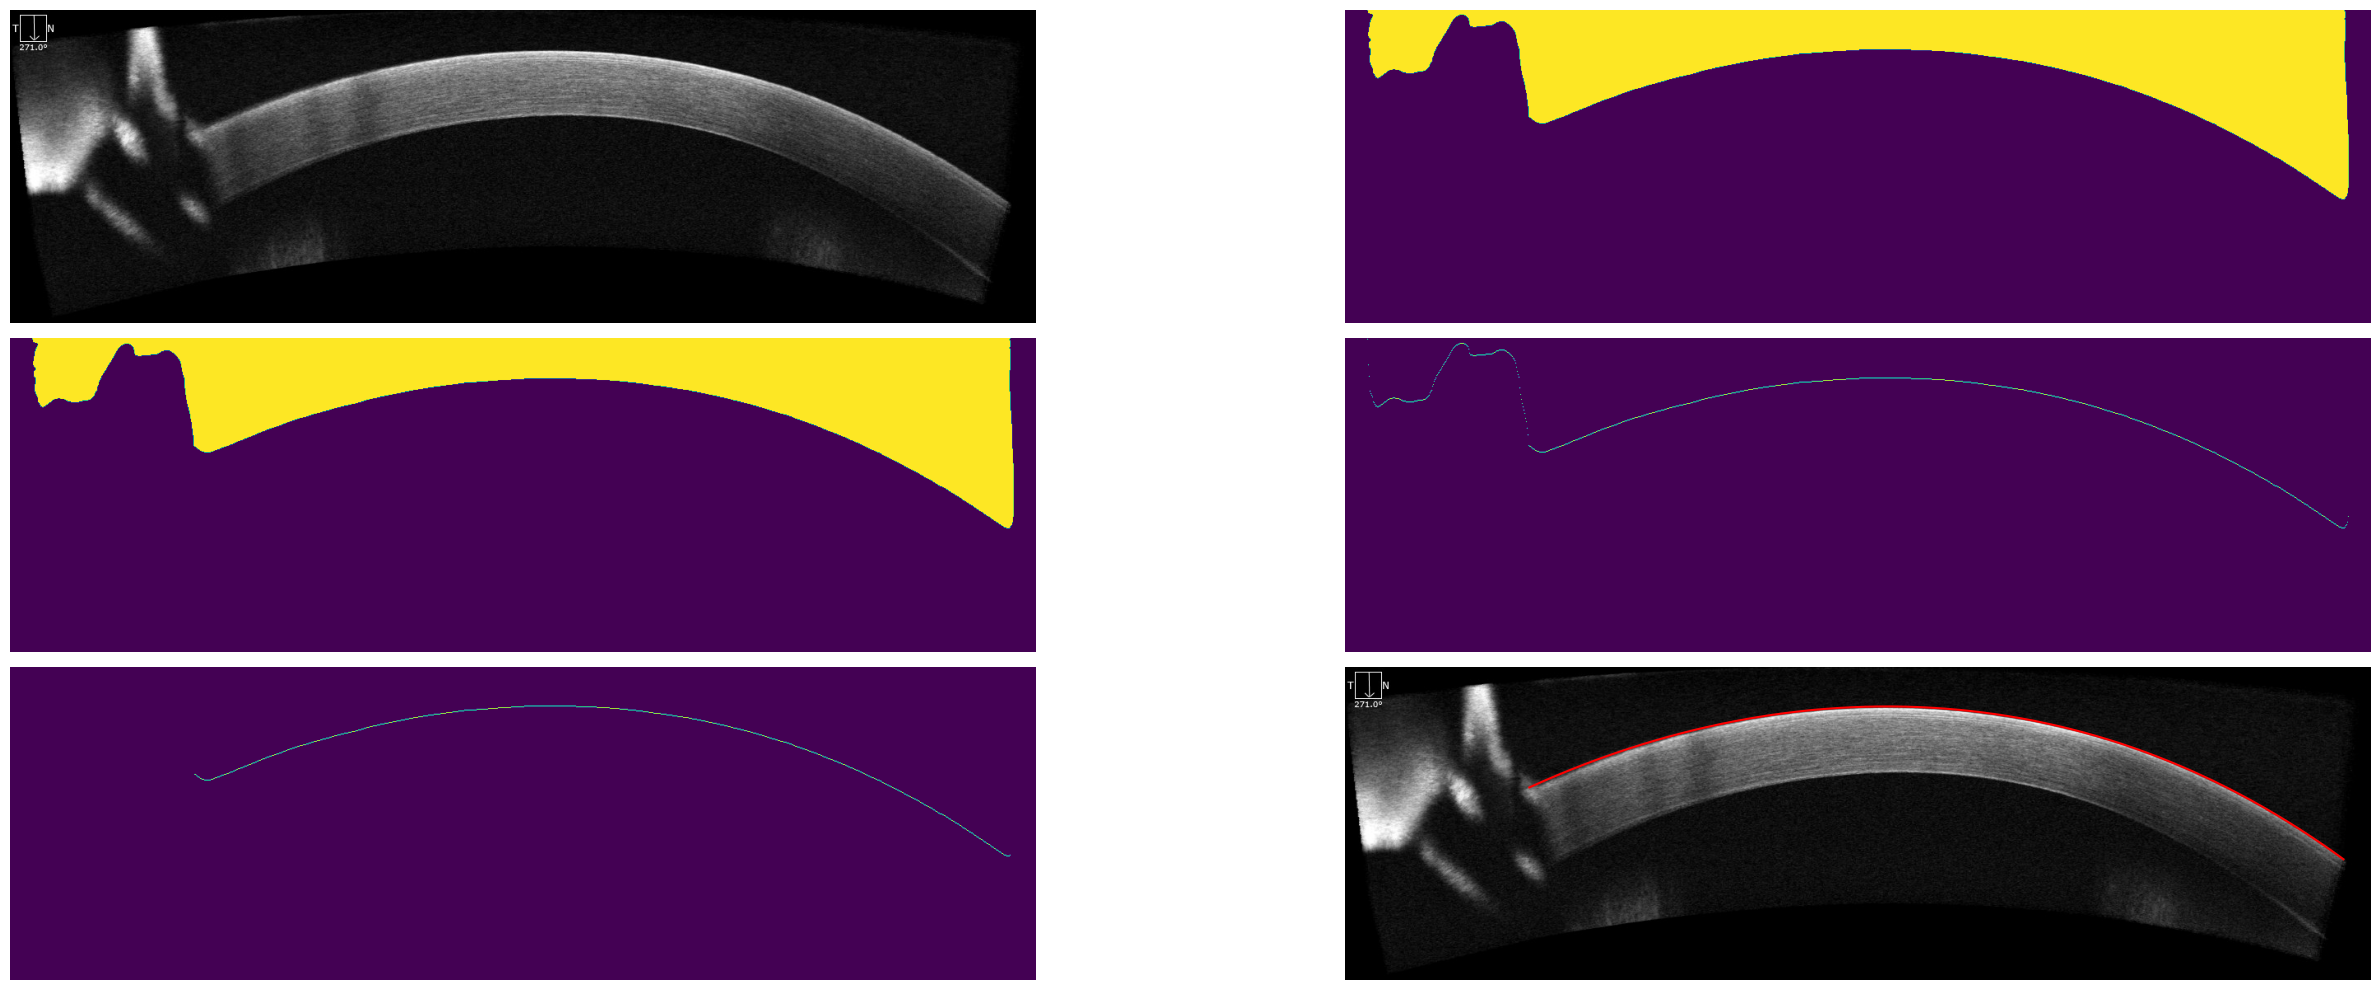

In [51]:
data1 = "/home/clement/Documents/data/Cornea/Images/MARTINEZ PETRO_ALEJANDRA__2135549_19870627_Female_HD Cornea_20230424123910_OD_20240705152122.jpg"
data2 = "/home/clement/Documents/data/Cornea/Images/MARTINEZ PETRO_ALEJANDRA__2135549_19870627_Female_HD Cornea_20230424124024_OD_20240705152039.jpg"
data3 = "/home/clement/Documents/data/Cornea/Images/MONTERO_JAVIER__2138700_19780913_Male_HD Cornea_20230517140555_OD_20240705152710.jpg"
data4 = "/home/clement/Documents/data/Cornea/Images/RICHER_JEAN-MICHEL__2151167_19870429_Male_HD Cornea_20231115120000_OS_20240705154023.jpg"
data5 = "/home/clement/Documents/data/Cornea/Images/TRUDEL_JOSEE__1882247_19960322_Female_HD Cornea_20230525114159_OD_20240705153207.jpg"
data6 = "/home/clement/Documents/data/Cornea/Images/TRUDEL_JOSEE__1882247_19960322_Female_HD Cornea_20230525114034_OD_20240705153225.jpg"
data7 = "/home/clement/Documents/data/Cornea/Images/TRUDEL_JOSEE__1882247_19960322_Female_HD Cornea_20230525114230_OD_20240705153155.jpg"


img = cv2.imread(data2)
H, W, _ = img.shape


mask = segment(img)
cleaned_mask = clean_segment_mask(mask)
interface_line = extract_interface_line(cleaned_mask).cpu().numpy()

cleaned_interface_line = clean_interface_line(interface_line, 0.95)

coeffs, x1, x2 = polyfit(cleaned_interface_line, 5, crop=25)
x = np.arange(x1, x2)
# x = np.arange(200, W - 200)
y = interpolate(coeffs, x)


fig, axs = plt.subplots(3, 2, figsize=(30, 10))
axs = np.ravel(axs)
for ax in axs:
    ax.axis("off")

axs[0].imshow(img)
axs[1].imshow(mask.cpu())
axs[2].imshow(cleaned_mask.cpu())
axs[3].imshow(interface_line)
axs[4].imshow(cleaned_interface_line)

axs[5].imshow(img)
axs[5].plot(x, y, color="red")
plt.tight_layout()
plt.show()